In [1]:
#### Set up of the required packages and load of the given Uber trips data


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')
%matplotlib inline

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

# data
uber = pd.read_csv("./Uber Request Data.csv")

In [2]:
## For Understanding of Uber data items 

uber.describe()
uber.info()
uber.columns
uber.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


(6745, 6)

In [3]:
# To view the uber data and understand data 
uber.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
uber.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


#### There are 6745 Trips informations of Uber from City to Airport and Airport to City with 6 columns

In [5]:
# To check what all status values in Status column
uber.Status.unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [6]:
# The space in the column names of the provided data is replaced by '_'

uber.columns = uber.columns.str.replace(" ", "_")

####  3 Status of trips have been provided..and there is no bad data in it like typo or other unknown status

In [7]:
#To understand if any other pickup points apart from City or Airport in Data
uber.Pickup_point.unique()

array(['Airport', 'City'], dtype=object)

#### There are no other pickup points other than City and Airport

# Data Cleansing identification

* From the above data viewed, noticed few data issues which need to be cleaned
  1. Request Time Stamp -  Date and Time format issues - different formats been used
  2. Drop Time Stamp -  Date and Time format issues - different formats been used
  
  ### Need to make all date formats consistent like month 7 transformed as 07, have all MM-DD-YYYY format, Time in AM/PM format
  ### Trip Status have different formats like Trip Completed, No Cars Available, Cancelled
  ### Null Values in Drop Timestamp in cases where trip was not performed only was requested
  ### 
  ### Column names have space in between , need to remove space and add _ for example

In [8]:
#to replace _ in Column names
uber.columns = [c.replace(' ', '_') for c in uber.columns]

In [9]:
## Checking columns again to ensure the Column names are without SPACES in between
uber.columns

Index(['Request_id', 'Pickup_point', 'Driver_id', 'Status',
       'Request_timestamp', 'Drop_timestamp'],
      dtype='object')

In [10]:
# to check null values
uber.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [11]:
null_columns=uber.columns[uber.isnull().any()]
uber[null_columns].isnull().sum()

Driver_id         2650
Drop_timestamp    3914
dtype: int64

### The next steps are to validate if NULL columns i.e. Driver_id and Drop_timestamp are valid or not and see if they need to be removed or replaced for better analysis

In [12]:
## Checking NULLs in Driver_id
print(uber[uber["Driver_id"].isnull()][null_columns])

      Driver_id Drop_timestamp
4095        NaN            NaN
4096        NaN            NaN
4097        NaN            NaN
4098        NaN            NaN
4099        NaN            NaN
4100        NaN            NaN
4101        NaN            NaN
4102        NaN            NaN
4103        NaN            NaN
4104        NaN            NaN
4105        NaN            NaN
4106        NaN            NaN
4107        NaN            NaN
4108        NaN            NaN
4109        NaN            NaN
4110        NaN            NaN
4111        NaN            NaN
4112        NaN            NaN
4113        NaN            NaN
4114        NaN            NaN
4115        NaN            NaN
4116        NaN            NaN
4117        NaN            NaN
4118        NaN            NaN
4119        NaN            NaN
4120        NaN            NaN
4121        NaN            NaN
4122        NaN            NaN
4123        NaN            NaN
4124        NaN            NaN
...         ...            ...
6715    

In [13]:
print(uber[uber["Drop_timestamp"].isnull()][null_columns])

      Driver_id Drop_timestamp
2831        1.0            NaN
2832        1.0            NaN
2833        1.0            NaN
2834        1.0            NaN
2835        2.0            NaN
2836        2.0            NaN
2837        2.0            NaN
2838        2.0            NaN
2839        3.0            NaN
2840        3.0            NaN
2841        3.0            NaN
2842        3.0            NaN
2843        4.0            NaN
2844        4.0            NaN
2845        4.0            NaN
2846        4.0            NaN
2847        4.0            NaN
2848        5.0            NaN
2849        5.0            NaN
2850        6.0            NaN
2851        6.0            NaN
2852        6.0            NaN
2853        6.0            NaN
2854        7.0            NaN
2855        7.0            NaN
2856        7.0            NaN
2857        8.0            NaN
2858        8.0            NaN
2859        8.0            NaN
2860        9.0            NaN
...         ...            ...
6715    

In [14]:
print(uber.loc[uber['Status'] == 'Trip Completed'])

      Request_id Pickup_point  Driver_id          Status    Request_timestamp  \
0            619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1            867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2           1807         City        1.0  Trip Completed       12/7/2016 9:17   
3           2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4           3112         City        1.0  Trip Completed  13-07-2016 08:33:16   
5           3879      Airport        1.0  Trip Completed  13-07-2016 21:57:28   
6           4270      Airport        1.0  Trip Completed  14-07-2016 06:15:32   
7           5510      Airport        1.0  Trip Completed  15-07-2016 05:11:52   
8           6248         City        1.0  Trip Completed  15-07-2016 17:57:27   
9            267         City        2.0  Trip Completed       11/7/2016 6:46   
10          1467      Airport        2.0  Trip Completed       12/7/2016 5:08   
11          1983         Cit

### As the above results show there are No NULL values when the Status os 'Trip Completed' so these are Valid values

In [15]:
print(uber.loc[uber['Status'] == 'No Cars Available'])

      Request_id Pickup_point  Driver_id             Status  \
4095        1362         City        NaN  No Cars Available   
4096        1364         City        NaN  No Cars Available   
4097        1366         City        NaN  No Cars Available   
4098           2      Airport        NaN  No Cars Available   
4099           7      Airport        NaN  No Cars Available   
4100           6         City        NaN  No Cars Available   
4101           4         City        NaN  No Cars Available   
4102           8         City        NaN  No Cars Available   
4103          12         City        NaN  No Cars Available   
4104          16      Airport        NaN  No Cars Available   
4105          14      Airport        NaN  No Cars Available   
4106          19         City        NaN  No Cars Available   
4107          15         City        NaN  No Cars Available   
4108          17      Airport        NaN  No Cars Available   
4109          20      Airport        NaN  No Cars Avail

### From the above, Driver id is NULL when the status is "No Cars Available", which shows this is VALID as the Driver info will not be available when there was no cars in that area

In [16]:
print(uber.loc[uber['Status'] == 'Cancelled'])

      Request_id Pickup_point  Driver_id     Status    Request_timestamp  \
2831        2905         City        1.0  Cancelled  13-07-2016 06:08:41   
2832        4805         City        1.0  Cancelled  14-07-2016 17:07:58   
2833        5202      Airport        1.0  Cancelled  14-07-2016 20:51:37   
2834        5927         City        1.0  Cancelled  15-07-2016 10:12:40   
2835        2347      Airport        2.0  Cancelled      12/7/2016 19:14   
2836        3806      Airport        2.0  Cancelled  13-07-2016 20:57:49   
2837        4451         City        2.0  Cancelled  14-07-2016 08:38:38   
2838        5023      Airport        2.0  Cancelled  14-07-2016 19:04:08   
2839          80         City        3.0  Cancelled       11/7/2016 4:47   
2840         534         City        3.0  Cancelled      11/7/2016 10:01   
2841        1867      Airport        3.0  Cancelled       12/7/2016 9:59   
2842        4383         City        3.0  Cancelled  14-07-2016 07:48:31   
2843        

## From the above, Drop_timestampe is NULL when the status is "No Cars Available", which shows this is VALID as the DROP time would not be available as the trip was either cancelled by the Customer or the Driver

## There is a gap in this data , if the information of who cancelled the trip is available then that would provided some good insights into the data to identify any gap if linked to the Uber drivers who are Cancelling the trips owing to some reasons like taking trips of other competitors like Ola, Meru etc.,

#### The data type of the timestamp columns are changed to datetime
#### Now when we check the dates and times in the 'Request_timestamp' and 'Drop_timestamp' they are consistent now with same format YYYY-MM-DD HH:MM:SS  
#### Dates in timestamp are not consistent, like some rows have month as single digit and some 2 digits, some have - as 
#### separator and some have /, then year format is also like some have YY and some have YYYY

In [17]:
## Changing the format of timestamp columns and ensuring all the dates are in same format i.e. dd , mm, yyyy positions
## in date are same for all
uber['Request_timestamp'] = pd.to_datetime(uber['Request_timestamp'], format="%d/%m/%y", dayfirst=True, infer_datetime_format=True)
uber['Drop_timestamp'] = pd.to_datetime(uber['Drop_timestamp'], format="%d/%m/%y",dayfirst=True, infer_datetime_format=True)
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


#### Now the dates format are consistent and are in same format

In [18]:
#Extracting date part from Request_timestamp
uber['Request_Date'] = uber['Request_timestamp'].dt.date
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13


In [19]:
#Extracting time part from Request_timestamp
uber['Request_Time'] = uber['Request_timestamp'].dt.time
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16


In [20]:
#Extracting day part from Request_timestamp
uber['Request_Day'] = uber['Request_timestamp'].dt.day
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Time,Request_Day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,13


In [21]:
#Convertime 24 Hr time of Request to AM PM format
uber['Request_Time_hr'] = uber['Request_timestamp'].dt.strftime('%I:%M %p')
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Time,Request_Day,Request_Time_hr
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11:51 AM
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,11,05:57 PM
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,12,09:17 AM
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,12,09:08 PM
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,13,08:33 AM


In [22]:
#Extracting date part from Drop_timestamp
uber['Drop_Date'] = uber['Drop_timestamp'].dt.date
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Time,Request_Day,Request_Time_hr,Drop_Date
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11:51 AM,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,11,05:57 PM,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,12,09:17 AM,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,12,09:08 PM,2016-07-12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,13,08:33 AM,2016-07-13


In [23]:
#Extracting time part from Drop_timestamp
uber['Drop_Time'] = uber['Drop_timestamp'].dt.time
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Time,Request_Day,Request_Time_hr,Drop_Date,Drop_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11:51 AM,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,11,05:57 PM,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,12,09:17 AM,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,12,09:08 PM,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,13,08:33 AM,2016-07-13,09:25:47


In [24]:
#Extracting day part from Drop_timestamp
uber['Drop_Day'] = uber['Drop_timestamp'].dt.day
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Time,Request_Day,Request_Time_hr,Drop_Date,Drop_Time,Drop_Day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11:51 AM,2016-07-11,13:00:00,11.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,11,05:57 PM,2016-07-11,18:47:00,11.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,12,09:17 AM,2016-07-12,09:58:00,12.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,12,09:08 PM,2016-07-12,22:03:00,12.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,13,08:33 AM,2016-07-13,09:25:47,13.0


In [25]:
#Convertime 24 Hr time of Drop to AM PM format
uber['Drop_Time_hr'] = uber['Drop_timestamp'].dt.strftime('%I:%M %p')
uber.head()


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Time,Request_Day,Request_Time_hr,Drop_Date,Drop_Time,Drop_Day,Drop_Time_hr
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11:51 AM,2016-07-11,13:00:00,11.0,01:00 PM
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,11,05:57 PM,2016-07-11,18:47:00,11.0,06:47 PM
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,12,09:17 AM,2016-07-12,09:58:00,12.0,09:58 AM
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,12,09:08 PM,2016-07-12,22:03:00,12.0,10:03 PM
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,13,08:33 AM,2016-07-13,09:25:47,13.0,09:25 AM


In [26]:
#Extracting hour part from Request_timestamp
uber['Request_Hour'] = uber['Request_timestamp'].dt.hour
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Time,Request_Day,Request_Time_hr,Drop_Date,Drop_Time,Drop_Day,Drop_Time_hr,Request_Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11:51 AM,2016-07-11,13:00:00,11.0,01:00 PM,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,11,05:57 PM,2016-07-11,18:47:00,11.0,06:47 PM,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,12,09:17 AM,2016-07-12,09:58:00,12.0,09:58 AM,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,12,09:08 PM,2016-07-12,22:03:00,12.0,10:03 PM,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,13,08:33 AM,2016-07-13,09:25:47,13.0,09:25 AM,8


In [27]:
### Creting a new dataframe with time slots
uber_slotD = uber.assign( 
    timeOfDay=pd.cut(
        uber.Request_timestamp.dt.hour,
        [-1, 4, 12, 16, 22, 24],
        labels=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Night']))


In [28]:
uber_slotD.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Time,Request_Day,Request_Time_hr,Drop_Date,Drop_Time,Drop_Day,Drop_Time_hr,Request_Hour,timeOfDay
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,11:51 AM,2016-07-11,13:00:00,11.0,01:00 PM,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,11,05:57 PM,2016-07-11,18:47:00,11.0,06:47 PM,17,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,12,09:17 AM,2016-07-12,09:58:00,12.0,09:58 AM,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,12,09:08 PM,2016-07-12,22:03:00,12.0,10:03 PM,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,13,08:33 AM,2016-07-13,09:25:47,13.0,09:25 AM,8,Morning


## Based on the Request Timestamp, 5 Timeslots have been created in new column 'timeOfDay'

### Early Morning -  00:00 AM to 4 AM
### Morning -  4 AM to 12 Noon
### Afternoon - Noon to 4 PM
### Evening - 4 PM to 10 PM
### Late Night - 10 PM to Mid-Night


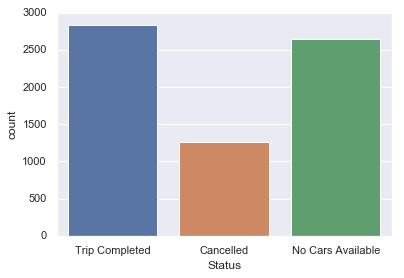

In [29]:
## To check distribution of Status of trips across the data
sns.set(style="darkgrid")
sns.countplot(x="Status", data=uber_slotD)



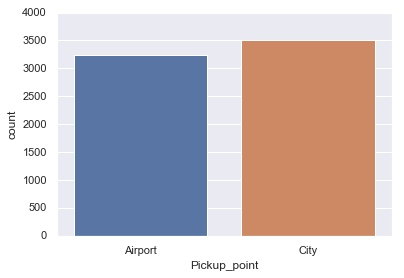

In [30]:
## To check distribution of Pick-up points of trips across the data
sns.countplot(x="Pickup_point", data=uber_slotD)

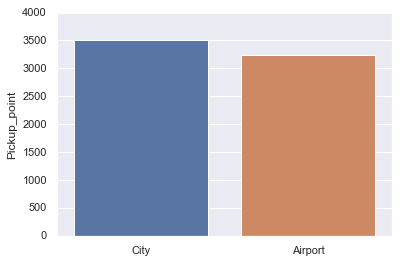

In [31]:
sns.barplot(x=uber_slotD.Pickup_point.value_counts().index, y=uber_slotD.Pickup_point.value_counts())


### The above plots don't give detailed info like , so trying lables with percentage on top 

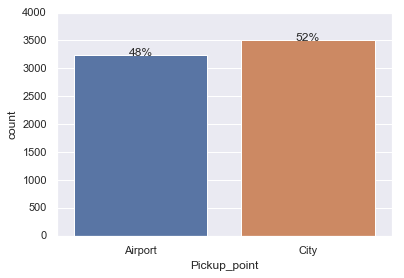

In [32]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")

total = float(len(uber_slotD))

ax = sns.countplot(x="Pickup_point", data=uber_slotD)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 
show()

### The plot above shows 52 % are City pick-ups and 48 % are Airport pick-ups , so this shows the to and for trips are almostly evenly matched 

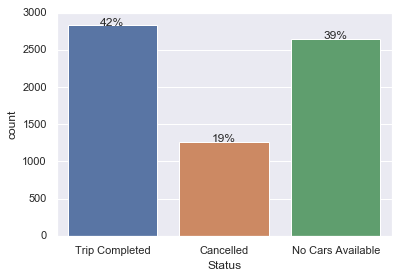

In [33]:
#from matplotlib.pyplot import show
#import seaborn as sns
#sns.set(style="darkgrid")

total = float(len(uber_slotD))

ax = sns.countplot(x="Status", data=uber_slotD)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 
show()

### The above plot shows the Status of trips, so only 42% of the Trips were completed by Uber and rest 58% have not been fulfilled by Uber , they were either cancelled by customer or driver or there were not enough cars in that pick up points around that time...Now we need to go in depth and see what are those factors that have created this gaps 

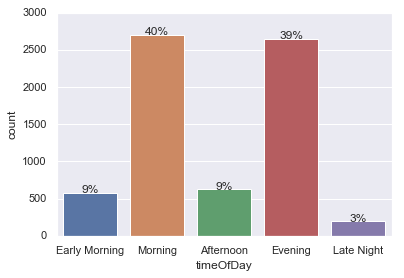

In [34]:


total = float(len(uber_slotD))

ax = sns.countplot(x="timeOfDay", data=uber_slotD)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 
show()

## The above plot goes a step further and shows what are the time slots when the demand is high...it shows major demand is in Evening i.e. 4 PM to 10 PM and Morning i.e. 4 A.M to Noon

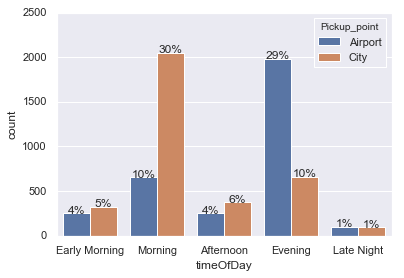

In [35]:


total = float(len(uber_slotD))

ax = sns.countplot(x="timeOfDay", hue="Pickup_point", data=uber_slotD)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 
show()

### The above plot shows the demand at the respective pickup points...so the demand as the overall plot above depicted shows the demand in evenly distributed in Airport and City and this also tells the in Evening there is 29% demand at Airport and 30 % in Morning at City

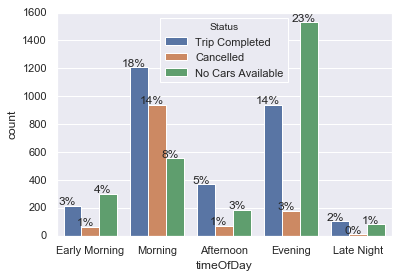

In [36]:
total = float(len(uber_slotD))

ax = sns.countplot(x="timeOfDay", hue="Status", data=uber_slotD)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
show()

### The above plot shows the Status of trips across the time slots

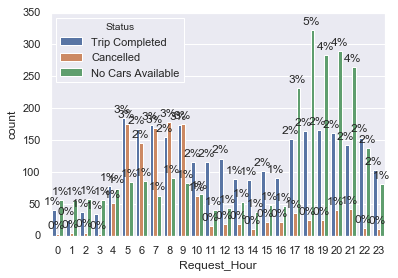

In [37]:
total = float(len(uber_slotD))

ax = sns.countplot(x="Request_Hour", hue="Status", data=uber_slotD)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
show()

### The above plot shows the Status of trips across the Requesy Hours...this plot can be depicted better , i think with lineplot but was unable to do it

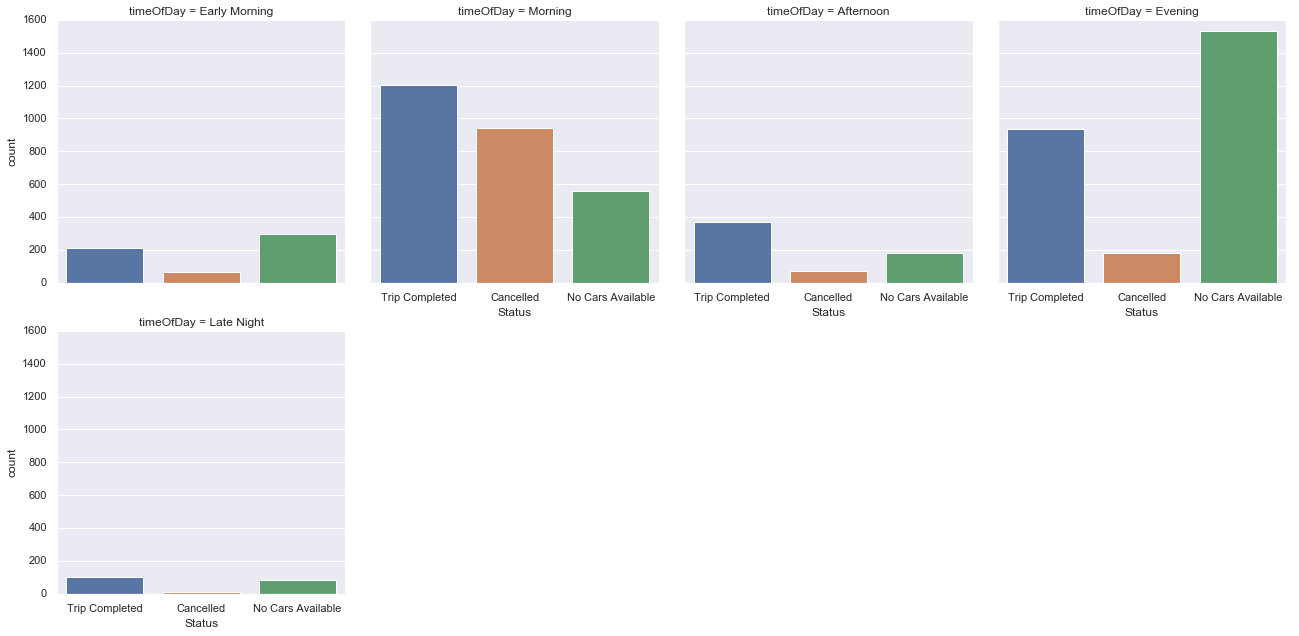

In [38]:

sns.catplot("Status", col="timeOfDay", col_wrap=4,
                  data=uber_slotD,
                 kind="count", height=4.5, aspect=1.0)


### Tried a different plot to get the whole picture of distribution in one single plot...I couldn't get the percentage on this plot..if would have got, i think this single plot could be enough instead of multiple plots above

In [39]:
uber[["Request_Time_hr", "Drop_Time_hr"]] = uber[["Request_Time_hr", "Drop_Time_hr"]].apply(pd.to_datetime)
uber_slotD[["Request_Time_hr", "Drop_Time_hr"]] = uber_slotD[["Request_Time_hr", "Drop_Time_hr"]].apply(pd.to_datetime)
uber['Driver_id'] = uber['Driver_id'].apply(pd.to_numeric, errors='ignore')
uber_slotD['Driver_id'] = uber_slotD['Driver_id'].apply(pd.to_numeric, errors='ignore')
#uber_trip_complete[["Driver_id"]] = uber_trip_complete[["Driver_id"]].astype(int)
#uber[["Request_Date", "Request_Time"]] = uber[["Request_Date", "Request_time"]].apply(pd.to_datetime)
#uber_slotD[["Drop_Date", "Drop_Time"]] = uber_slotD[["Request_Time", "Drop_Time"]].apply(pd.to_datetime)

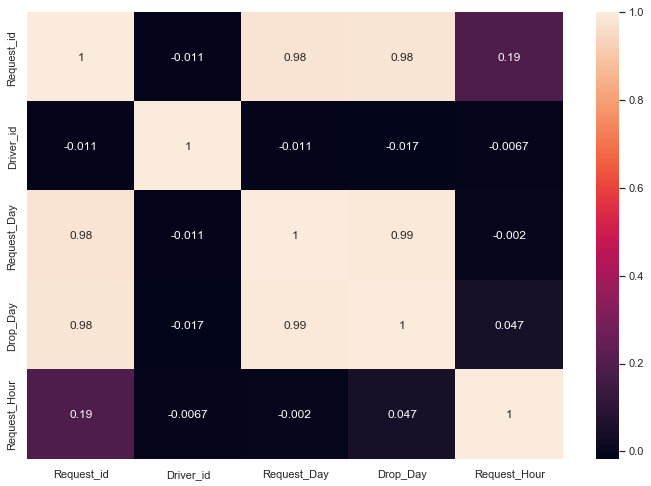

In [40]:
plt.figure(figsize=(12, 8))

uber_corr = uber_slotD.corr()
sns.heatmap(uber_corr, 
            xticklabels = uber_corr.columns.values,
            yticklabels = uber_corr.columns.values,
            annot = True);

### Tried a Heatmap to get the Correlation of all the numeric variables...see good correlation from the perspective of drivers taking to and fro with some exceptions which shows that the Drivers almost have used Uber as an aggregator instead of going with Uber's competitors

/Users/naveedjd/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 1008x1008 with 0 Axes>

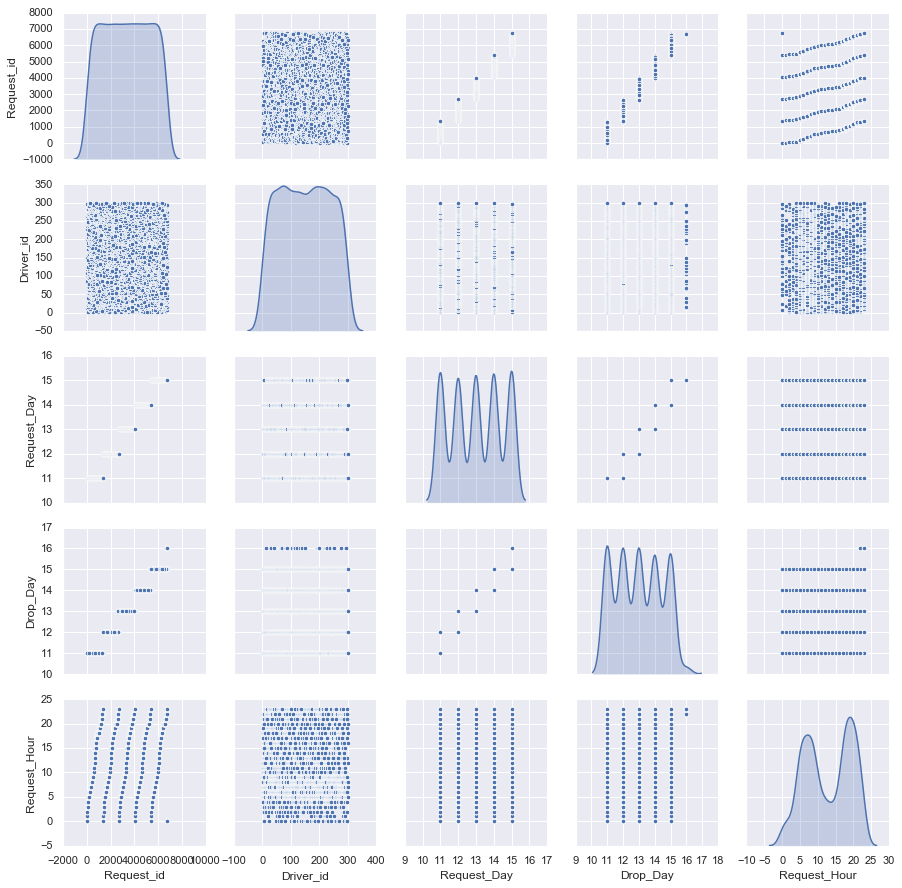

In [41]:
plt.figure(figsize=(14, 14))

sns.pairplot(uber_slotD, diag_kind='kde');

### The above plot is not much usefule except for the Request Hour which shows the distribution of the demand which shows clearly the PEAK request Hours which is around 5 to 6 AM and around 8 PM

In [42]:
## Grouping by time slots across  using driver id
uber_driver_grp = uber_slotD.groupby('timeOfDay')['Driver_id'].count().sort_values(ascending=False)
uber_driver_grp

timeOfDay
Morning          2145
Evening          1116
Afternoon         442
Early Morning     279
Late Night        113
Name: Driver_id, dtype: int64

### The above data shows the distribution of drivers across the timeslots...but not this not unique

In [43]:
## Grouping by  Driver id
uber_driver_grp = uber_slotD.groupby('Driver_id')['Status'].count().sort_values(ascending=False)
uber_driver_grp


Driver_id
27.0     22
84.0     21
22.0     21
70.0     21
176.0    21
177.0    21
197.0    20
114.0    20
142.0    20
69.0     20
24.0     20
54.0     19
212.0    19
78.0     19
16.0     19
107.0    19
9.0      19
274.0    18
98.0     18
233.0    18
230.0    18
105.0    18
225.0    18
109.0    18
80.0     18
37.0     18
126.0    18
204.0    18
125.0    18
210.0    17
         ..
55.0     10
10.0     10
260.0    10
53.0     10
252.0     9
8.0       9
288.0     9
216.0     9
253.0     9
192.0     9
209.0     9
133.0     9
187.0     9
91.0      9
95.0      9
56.0      9
122.0     9
293.0     8
292.0     8
117.0     8
41.0      8
217.0     8
11.0      8
143.0     8
189.0     8
208.0     8
42.0      7
123.0     7
265.0     6
300.0     6
Name: Status, Length: 300, dtype: int64

### The above shows the Driver Id who have taken the maximum trips in descending order

In [44]:
uber_analysis= uber_slotD.groupby('Status')['Request_id'].count().sort_values(ascending=False)
uber_analysis

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Request_id, dtype: int64

### The above data shows the number of trips that were completed /cancelled or cars were not available

# Below is the analysis for Demand and Supply with Gap

In [45]:
## A function defined to find the demand, supply and gap...Basically all the request in the data would be considered as demand
## so all the rows i.e. 6745 would be the demand...so any status record would be a 'demand' and this is filled in a new
## column of the dataframe as column "Demand" ... And Another function called Supply is created which when the Status is
## either Cancelled ot No Cars Available would return gap else supply i.e. in this status it would mean the value 'gap'
## denotes the trip was not done by Uber else it has supplied i.e. in case of Trip completed..this value is filled in a 
## new column of the dataframe by namen "Supply"

def demand(x):
    if x['Status'] == "Cancelled" or x['Status'] == "No Cars Available" or x['Status'] == "Trip Completed":
       return 'demand'
    else:
        return 'NA'

def supply(y):
    if y['Status'] == "Cancelled" or y['Status'] == "No Cars Available":
        return 'gap'
    else:
        return 'supply'

    
uber_slotD = uber_slotD.assign(Demand=uber_slotD.apply(demand,axis=1))
uber_slotD = uber_slotD.assign(Supply=uber_slotD.apply(supply,axis=1)) 

In [46]:
uber_slotD.tail()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Time,Request_Day,Request_Time_hr,Drop_Date,Drop_Time,Drop_Day,Drop_Time_hr,Request_Hour,timeOfDay,Demand,Supply
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,2016-07-15,23:49:03,15,2019-02-26 23:49:00,NaT,NaT,NaN,NaT,23,Late Night,demand,gap
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,2016-07-15,23:50:05,15,2019-02-26 23:50:00,NaT,NaT,NaN,NaT,23,Late Night,demand,gap
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,2016-07-15,23:52:06,15,2019-02-26 23:52:00,NaT,NaT,NaN,NaT,23,Late Night,demand,gap
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,2016-07-15,23:54:39,15,2019-02-26 23:54:00,NaT,NaT,NaN,NaT,23,Late Night,demand,gap
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT,2016-07-15,23:55:03,15,2019-02-26 23:55:00,NaT,NaT,NaN,NaT,23,Late Night,demand,gap


## Now the revised dataframe contains the 'demand', 'supply' and 'gap' information for each row in the dataframe 


In [47]:
print("Uber's Demand = ", uber_slotD.Demand.count())
print("Uber's  Gap & ",uber_slotD.groupby('Supply')['Supply'].count())

Uber's Demand =  6745
Uber's  Gap &  Supply
gap       3914
supply    2831
Name: Supply, dtype: int64


##  The above shows out of 6745 request i.e Demand , only 2831 requests were supplied by Uber and rest 3914 requests were not supplied by Uber...Let's now plot to better understand this gap and supply

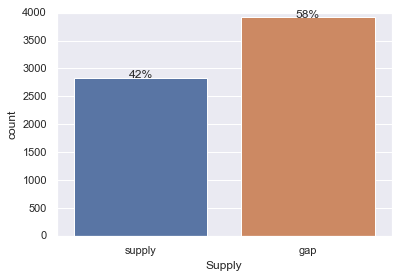

In [48]:
total = float(len(uber_slotD))

ax = sns.countplot(x="Supply", data=uber_slotD)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 
show()

## The above plot shows very clearly that 58% is the Gap and 42% is the Supply... 58% is a whooping figure that Uber has failed to fulfill or supply to the demand of the Uber's users...Let's figure out where and how this gap has come

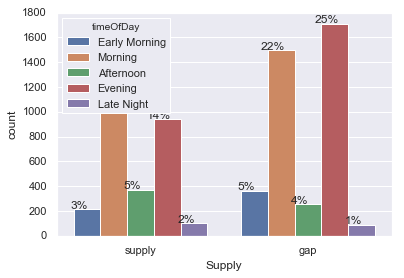

In [49]:
total = float(len(uber_slotD))

ax = sns.countplot(x="Supply", hue="timeOfDay", data=uber_slotD)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
show()

### The above depicts the Time slots of gap and supply....Gap is shown clearly that 25% of 58% is during Evening and 22% of 58% is in morning...this together consitute a major portion of the Gap that Uber needs to focus on to supply

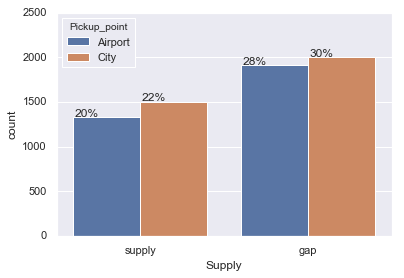

In [50]:
total = float(len(uber_slotD))

ax = sns.countplot(x="Supply", hue="Pickup_point", data=uber_slotD)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
show()

## The above plot depcits that 30% of the gap is at the City pickup point and 28% is at the Airport pick up point

In [51]:
## Exporting the databframe to CSV file for Tableau analysis
uber_slotD.to_csv("./uber_demand_supply_gap.csv")